<a href="https://colab.research.google.com/github/Sivagadiraju/Home_assignment3/blob/main/part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 0.6740 - loss: 0.5859 - val_accuracy: 0.8636 - val_loss: 0.3469
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 387ms/step - accuracy: 0.8956 - loss: 0.2659 - val_accuracy: 0.8800 - val_loss: 0.3071
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 362ms/step - accuracy: 0.9358 - loss: 0.1816 - val_accuracy: 0.8558 - val_loss: 0.3466
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step


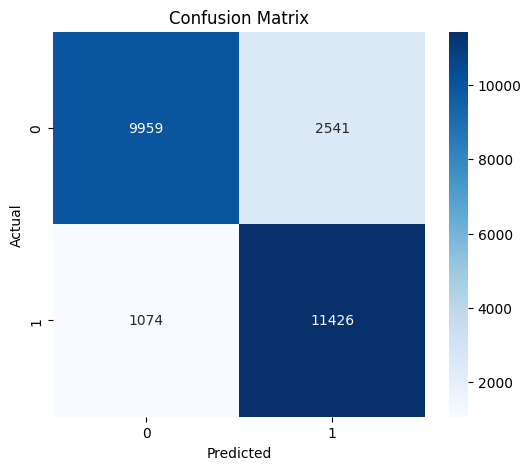


Classification Report:
              precision    recall  f1-score   support

           0     0.9027    0.7967    0.8464     12500
           1     0.8181    0.9141    0.8634     12500

    accuracy                         0.8554     25000
   macro avg     0.8604    0.8554    0.8549     25000
weighted avg     0.8604    0.8554    0.8549     25000



In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the IMDB dataset
vocab_size = 10000  # Use top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Step 2: Preprocess - Pad sequences
maxlen = 200  # max length of reviews
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Step 3: Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train model
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

# Step 5: Evaluate model
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))
